In [1]:
from model.AE_quant import AutoEncoder, train_model
from utils.utils import PreprocessData, EDAProcess
import torch
from torch import nn
import pandas as pd
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Process Input Data

In [2]:
df = pd.read_csv("./last_price.csv")
data_processing = PreprocessData(df)
train_loader = data_processing.get_train_loader()

### Define Model and Training

In [3]:
model = AutoEncoder(act=nn.SELU(inplace=True),dim_input=83, d=10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

KeyboardInterrupt: 

In [ ]:
train_model(model, optimizer, train_loader, 1500)

Epoch 0:   0%|          | 0/5 [00:00<?, ? batch/s]c:\Users\THE BANG\anaconda3\envs\cv_research\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
Epoch 1500: 100%|██████████| 5/5 [00:00<00:00, 114.20 batch/s, loss=0.0086]


### Process Output Data

In [ ]:
model.eval()
data_train = data_processing.data_train
data_output = model.forward(torch.tensor(data_processing.data_norm).to(device))
data_output = data_processing.get_inverse_output(data_output)
company_names = data_processing.company_names
EDA_processing = EDAProcess(data_train, data_output, company_names)

c:\Users\THE BANG\anaconda3\envs\cv_research\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


### Get min, max index

In [ ]:
min_index, max_index = EDA_processing.get_min_max_index()

max loss: 35
Company name: SLS

min loss: 14
Company name: JVC


### Min loss Histogram

Min Loss
TDV:  0.02142578735947609


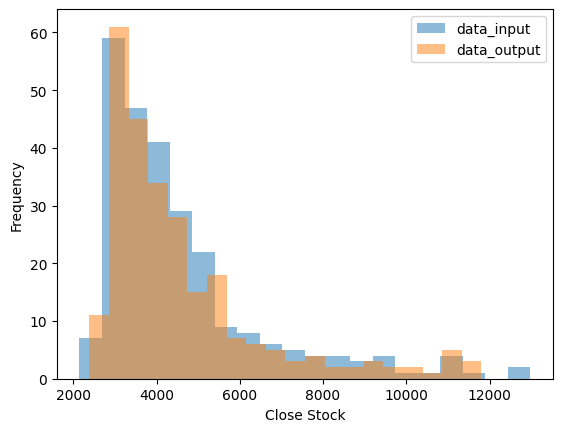

In [ ]:
print("Min Loss")
print("TDV: ", EDA_processing.get_TVD(min_index))
EDA_processing.plot_histgram("min")



### Max loss Histogram

Max Loss
TDV:  0.027480026707053185


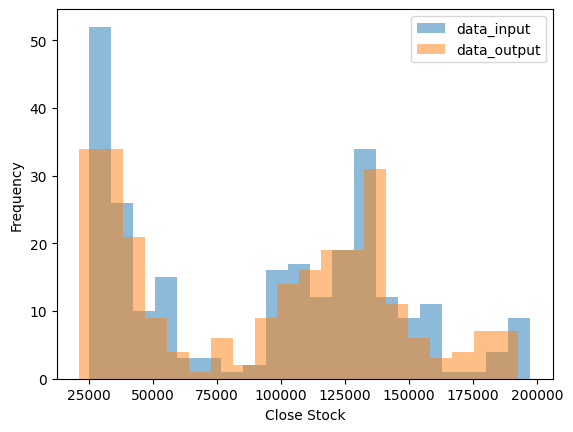

In [ ]:
print("Max Loss")
print("TDV: ", EDA_processing.get_TVD(max_index))
EDA_processing.plot_histgram("max")

### Plot Side by Side Box

In [ ]:
df_iv = EDA_processing.get_interleaved_data()

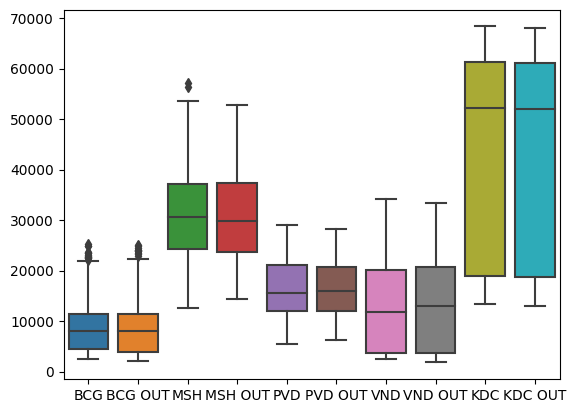

In [ ]:
EDA_processing.plot_side_by_side_box(df_iv, 0, 10)

### Plot Density

In [ ]:
EDA_processing.plot_density()

AttributeError: '_iLocIndexer' object has no attribute 'plot'